In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min



In [13]:
df = pd.read_excel('Data.xlsx', 'Customer_Master')
df.head()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1000125,Customer 1,4002351,Company 1,Export,92468.0,92345.0,Export,Export,100.777442,13.746792,Bangkok,Thailand,Thailand,Organization 2,NaN
1,1000343,Customer 2,4002351,Company 1,Export,92468.0,92345.0,Export,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001879,Customer 3,4002351,Company 1,Export,92468.0,92345.0,Export,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001880,Customer 4,4002351,Company 1,Export,92468.0,92345.0,Export,Export,121.471181,31.233623,Shanghai,China,China,Organization 2,NaN
4,1002325,Customer 5,4002351,Company 1,Export,92468.0,92345.0,Export,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns_to_drop = ['SoldToCode','SoldToName','MajorAccount','MajorAccountCode','Channel','SubChannel','MajorAccountCode.1','SalesOrganization']
df = df.drop(columns_to_drop, axis=1)
df

,CustomerRef,CustomerName,Longitude,Latitude,City,State,Country,Region
0,1000125,Customer 1,100.777442,13.746792,Bangkok,Thailand,Thailand,NaN
1,1000343,Customer 2,NaN,NaN,NaN,NaN,NaN,NaN
2,1001879,Customer 3,NaN,NaN,NaN,NaN,NaN,NaN
3,1001880,Customer 4,121.471181,31.233623,Shanghai,China,China,NaN
4,1002325,Customer 5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
854,2011528,Customer 857,145.156241,-38.094313,Frankston,Victoria,Australia,Greater Melbourne
855,2007503,Customer 856,NaN,NaN,NaN,NaN,NaN,NaN
856,4014549,Customer 774,145.136628,-37.952852,Kingston,Victoria,Australia,Greater Melbourne
857,4004674,Customer 858,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.dropna()
df

,CustomerRef,CustomerName,Longitude,Latitude,City,State,Country,Region
38,1047983,Customer 39,152.947407,-27.562473,Brisbane,Queensland,Australia,Greater Brisbane
45,1058155,Customer 46,145.638005,-35.911935,Moira,Victoria,Australia,Shepparton
47,11000128,Customer 48,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Greater Melbourne
48,11000139,Customer 49,145.280163,-37.845441,Knox,Victoria,Australia,Greater Melbourne
49,11000144,Customer 50,144.947676,-37.728991,Moreland,Victoria,Australia,Greater Melbourne
...,...,...,...,...,...,...,...,...
851,14022378,Customer 657,150.879636,-33.786112,Blacktown,New South Wales,Australia,Greater Sydney
852,14022384,Customer 658,144.740119,-37.832533,Wyndham,Victoria,Australia,Greater Melbourne
853,14022441,Customer 659,116.006693,-31.845847,Swan,Western Australia,Australia,Perth
854,2011528,Customer 857,145.156241,-38.094313,Frankston,Victoria,Australia,Greater Melbourne


In [16]:
df.drop_duplicates()
df.to_excel('Newdata.xlsx', index=False)

In [32]:
df.describe()

,CustomerRef,Longitude,Latitude
count,6.950000e+02,695.000000,695.000000
mean,1.257338e+07,144.446812,-33.331511
std,1.642696e+06,10.155291,5.460912
min,1.047983e+06,114.633660,-42.978787
25%,1.100181e+07,144.776840,-37.801400
50%,1.400117e+07,145.479530,-33.950289
75%,1.401603e+07,151.024650,-31.859008
max,1.402244e+07,153.528756,-12.427766


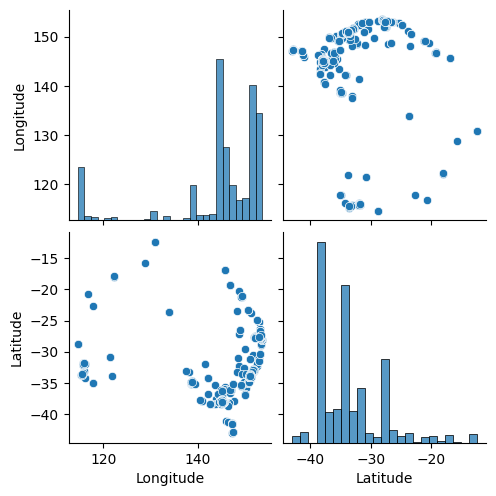

In [33]:
sns.pairplot(df[['Longitude','Latitude']])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

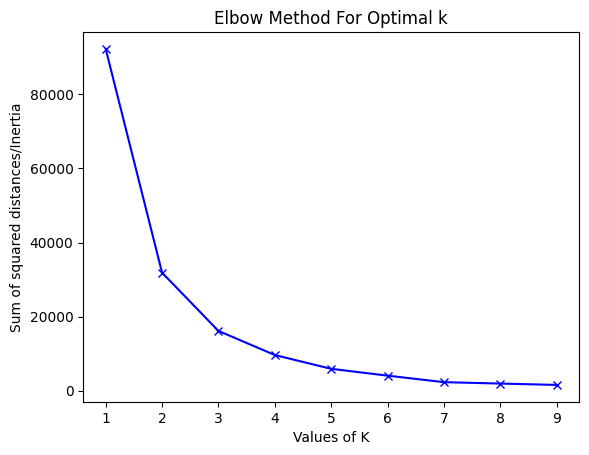

In [17]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = cluster.KMeans(n_clusters=num_clusters)
 kmeans = kmeans.fit(df[['Longitude','Latitude']])
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
kmeans = cluster.KMeans(n_clusters=3 ,n_init=10)
kmeans = kmeans.fit(df[['Longitude','Latitude']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

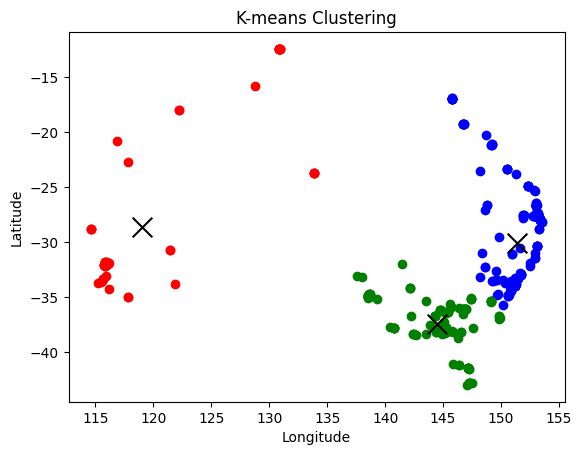

In [19]:
coordinates = df[['Longitude', 'Latitude']]
# Plot the data points with different colors for each cluster
for i in range(len(coordinates)):
    plt.scatter(coordinates.iloc[i, 0], coordinates.iloc[i, 1], c='blue' if labels[i] == 0 else 'red' if labels[i] == 1 else 'green')

# Plot the cluster centers as X symbols
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', s=200)

# Set plot title and labels
plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

In [32]:
kmeans.cluster_centers_.value

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [24]:
coordinates['Clusters'] = kmeans.labels_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18536\2473463761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates['Clusters'] = kmeans.labels_


In [25]:
df['Clusters'].value_counts()
coordinates.to_excel('Newdata.xlsx', index=False)

In [31]:
df1 = pd.read_excel('Facility.xlsx')
df1.head()

,FacilityRef,FacilityName,Type,Address,Street,Suburb,Postcode,StorageCapacityInPallet,Longitude,Latitude,City,State
0,A019,Facility 1,DC,"27, Barnes Road, Altona North, VIC, 3025",27 Barnes Road,Altona North,3025.0,42000.0,144.837889,-37.843627,Hobsons Bay,Victoria
1,A045,Facility 2,Plant,"Darnum Park Rd, Darnum, VIC, 3822",Darnum Park Rd,Darnum,3822.0,600.0,146.006644,-38.173387,Baw Baw,Victoria
2,A003,Facility 3,Plant,"155, Mersey Main Rd, Spreyton, TAS, 7310","155, Mersey Main Rd",Spreyton,7310.0,15360.0,146.354230,-41.224665,Latrobe,Tasmania
3,A093,Facility 4,DC,"19, Agar Drive, Truganina, VIC, 3029",19 Agar Drive,Truganina,3029.0,48000.0,144.751154,-37.781694,Melton,Victoria
4,A093,Facility 4,DC,"19, Agar Drive, Truganina, VIC, 3029",19 Agar Drive,Truganina,3029.0,48000.0,144.746868,-37.798232,Melton,Victoria


In [34]:
X = df1[['Latitude', 'Longitude']].values
X

array([[-37.8436274, 144.8378889],
       [-38.1733874, 146.006644 ],
       [-41.2246653, 146.3542296],
       [-37.781694 , 144.751154 ],
       [-37.7982317, 144.7468676],
       [-37.7982317, 144.7468676],
       [-37.840767 , 144.837577 ],
       [-37.825821 , 144.796527 ],
       [-36.666654 , 149.82471  ],
       [-36.307762 , 145.041962 ],
       [-38.3273997, 143.064535 ],
       [-38.327407 , 143.064488 ],
       [-36.448018 , 144.982562 ],
       [-38.173245 , 146.006907 ],
       [-40.989144 , 145.709869 ],
       [-41.218794 , 146.360487 ],
       [-37.844961 , 145.278621 ],
       [-37.6929187, 144.8708013],
       [-37.662794 , 144.9564944],
       [-37.8152778, 144.801944 ],
       [-36.94538  , 149.84349  ],
       [-37.8358552, 144.9211831],
       [-37.662794 , 144.9564944],
       [-37.8461837, 144.8305142],
       [-37.859043 , 144.810632 ],
       [-38.3543076, 142.437722 ],
       [-35.1210247, 147.3794964]])

In [36]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[151.39545634, -30.08985361],
       [119.02466583, -28.65377887],
       [144.44003869, -37.44338703]])

In [48]:
df1 = pd.read_excel('Facility.xlsx')
df1.head()

,FacilityRef,FacilityName,Type,Address,Street,Suburb,Postcode,StorageCapacityInPallet,Longitude,Latitude,City,State
0,A019,Facility 1,DC,"27, Barnes Road, Altona North, VIC, 3025",27 Barnes Road,Altona North,3025.0,42000.0,144.837889,-37.843627,Hobsons Bay,Victoria
1,A045,Facility 2,Plant,"Darnum Park Rd, Darnum, VIC, 3822",Darnum Park Rd,Darnum,3822.0,600.0,146.006644,-38.173387,Baw Baw,Victoria
2,A003,Facility 3,Plant,"155, Mersey Main Rd, Spreyton, TAS, 7310","155, Mersey Main Rd",Spreyton,7310.0,15360.0,146.354230,-41.224665,Latrobe,Tasmania
3,A093,Facility 4,DC,"19, Agar Drive, Truganina, VIC, 3029",19 Agar Drive,Truganina,3029.0,48000.0,144.751154,-37.781694,Melton,Victoria
4,A093,Facility 4,DC,"19, Agar Drive, Truganina, VIC, 3029",19 Agar Drive,Truganina,3029.0,48000.0,144.746868,-37.798232,Melton,Victoria


In [53]:
df1 = df1.dropna()
df1['Longitude'] = pd.to_numeric(df1['Longitude'], errors='coerce')
df1['Latitude'] = pd.to_numeric(df1['Latitude'], errors='coerce')
points = df1[['Longitude','Latitude']]
points

,Longitude,Latitude
0,144.837889,-37.843627
1,146.006644,-38.173387
2,146.354230,-41.224665
3,144.751154,-37.781694
4,144.746868,-37.798232
5,144.746868,-37.798232
6,144.837577,-37.840767
7,144.796527,-37.825821
8,149.824710,-36.666654
9,145.041962,-36.307762


In [61]:
import math

def find_nearest_point(center, points):
    min_distance = float('inf')
    nearest_point = None

    for point in points:
        distance = math.sqrt((point[0] - center[0]) ** 2 + (point[1] - center[1]) ** 2)
        if distance < min_distance:
            min_distance = distance
            nearest_point = point

    return nearest_point

def find_nearest_points(centers, points):
    nearest_points = []

    for center in centers:
        nearest_point = find_nearest_point(center, points)
        nearest_points.append(nearest_point)

    return nearest_points

# Example usage
points = df1[['Longitude','Latitude']].values.tolist()
centers = kmeans.cluster_centers_
nearest_points = find_nearest_points(centers, points)

nearest_points = find_nearest_points(centers, points)

nearest_points


[[149.82471, -36.666654], [143.064488, -38.327407], [144.751154, -37.781694]]

In [67]:
points_set = set(tuple(point) for point in nearest_points)

# Filter the dataframe based on the matching longitude and latitude
filtered_df = df1[df1[['Longitude', 'Latitude']].apply(lambda row: tuple(row) in points_set, axis=1)]

filtered_df

,FacilityRef,FacilityName,Type,Address,Street,Suburb,Postcode,StorageCapacityInPallet,Longitude,Latitude,City,State
3,A093,Facility 4,DC,"19, Agar Drive, Truganina, VIC, 3029",19 Agar Drive,Truganina,3029.0,48000.0,144.751154,-37.781694,Melton,Victoria
8,A046,Facility 7,DC,"17 Ridge Street, Bega, NSW,2550",17 Ridge Street,Bega,2550.0,4200.0,149.824710,-36.666654,Bega Valley,New South Wales
11,A044,Facility 9,Plant,"129 Curdie Street, Cobden, Vic, 3266",129 Curdie Street,Cobden,3266.0,600.0,143.064488,-38.327407,Corangamite,Victoria
